sklearn: 0.19.1
(456, 13)
(50, 13)
(456,)
(50,)
(339, 13)
(167, 13)
(339,)
(167,)
Fit a model X_train, and calculate MSE with Y_train: 19.546758
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367


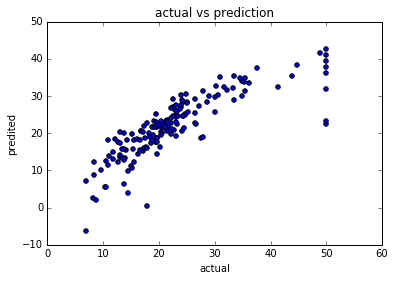

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import load_boston
import sklearn as sklearn
print('sklearn: {}'.format(sklearn.__version__))


boston = load_boston()
boston.keys()
boston.data.shape

boston.feature_names
boston.DESCR

#convert boston.data into a pandas data frame.
bos = pd.DataFrame(boston.data)
bos.head()

# column names are just numbers, so I am going to replace those numbers with the feature names
bos.columns = boston.feature_names
bos.head()
#boston.target contains the housing prices.
boston.target[:5]
#add these target prices to the bos data frame
bos['PRICE'] = boston.target

# X = all the other features (or independent variables)
# drop the price column as I want only the parameters as my X values.
X = bos.drop('PRICE',axis=1)
Y = bos.PRICE

X_train=X[:-50]
X_test=X[-50:]
Y_train=Y[:-50]
Y_test=Y[-50:]

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

#you may be training your model on less expensive houses and testing on expensive houses.
#You have to divide your data sets randomly. Scikit learn provides a function called train_test_split to do this.

X_train,X_test, Y_train,Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33,random_state=5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

lm= LinearRegression()
lm.fit(X_train,Y_train)

lm.intercept_
lm.coef_

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print ("Fit a model X_train, and calculate MSE with Y_train: %f" % np.mean((Y_train - pred_train) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test: %f"% np.mean((Y_test - pred_test) ** 2))


plt.scatter(Y_test,pred_test)
plt.xlabel("actual")
plt.ylabel("predited")
plt.title("actual vs prediction")
plt.show()


#zip (Y_test,pred_test)
#zip (Y_train,pred_train)

